In [13]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

In [15]:
# 1. Load & deduplicate
df = pd.read_csv('ucla_orgs_cleaned.csv')
df_unique = df.drop_duplicates(subset='name', keep='first')

In [16]:
df.shape

(2829, 4)

In [17]:
len(df['category'])

2829

In [18]:
len(np.unique(df['name'].values))

1439

In [19]:
# Group by club name and count how many unique categories each club appears in
multi_category_clubs = df.groupby('name')['category'].nunique().reset_index()
# Filter for clubs that appear in more than one category
multi_category_clubs = multi_category_clubs[multi_category_clubs['category'] > 1]

In [20]:
# For each club that appears in multiple categories, list the unique categories as a comma-separated string
multi_category_names = df[df['name'].isin(multi_category_clubs['name'])] \
    .groupby('name')['category'] \
    .unique() \
    .reset_index()
# Convert list of categories to a comma-separated string
multi_category_names['category'] = multi_category_names['category'].apply(lambda x: ', '.join(sorted(x)))

In [21]:
multi_category_names

,name,category
0,(Re)Defining Health,"educational, medical"
1,180 Degrees Consulting,"business, service"
2,3D4E at UCLA,"educational, engineering"
3,A Moment of Magic at UCLA,"community service, health and wellness"
4,AAAA - Furries at UCLA,"arts, cultural"
...,...,...
1385,exploretech.la,"service, technology"
1386,iKNITiative,"arts, social"
1387,in-version ensemble,"arts, theater"
1388,readymade,"asian, music"


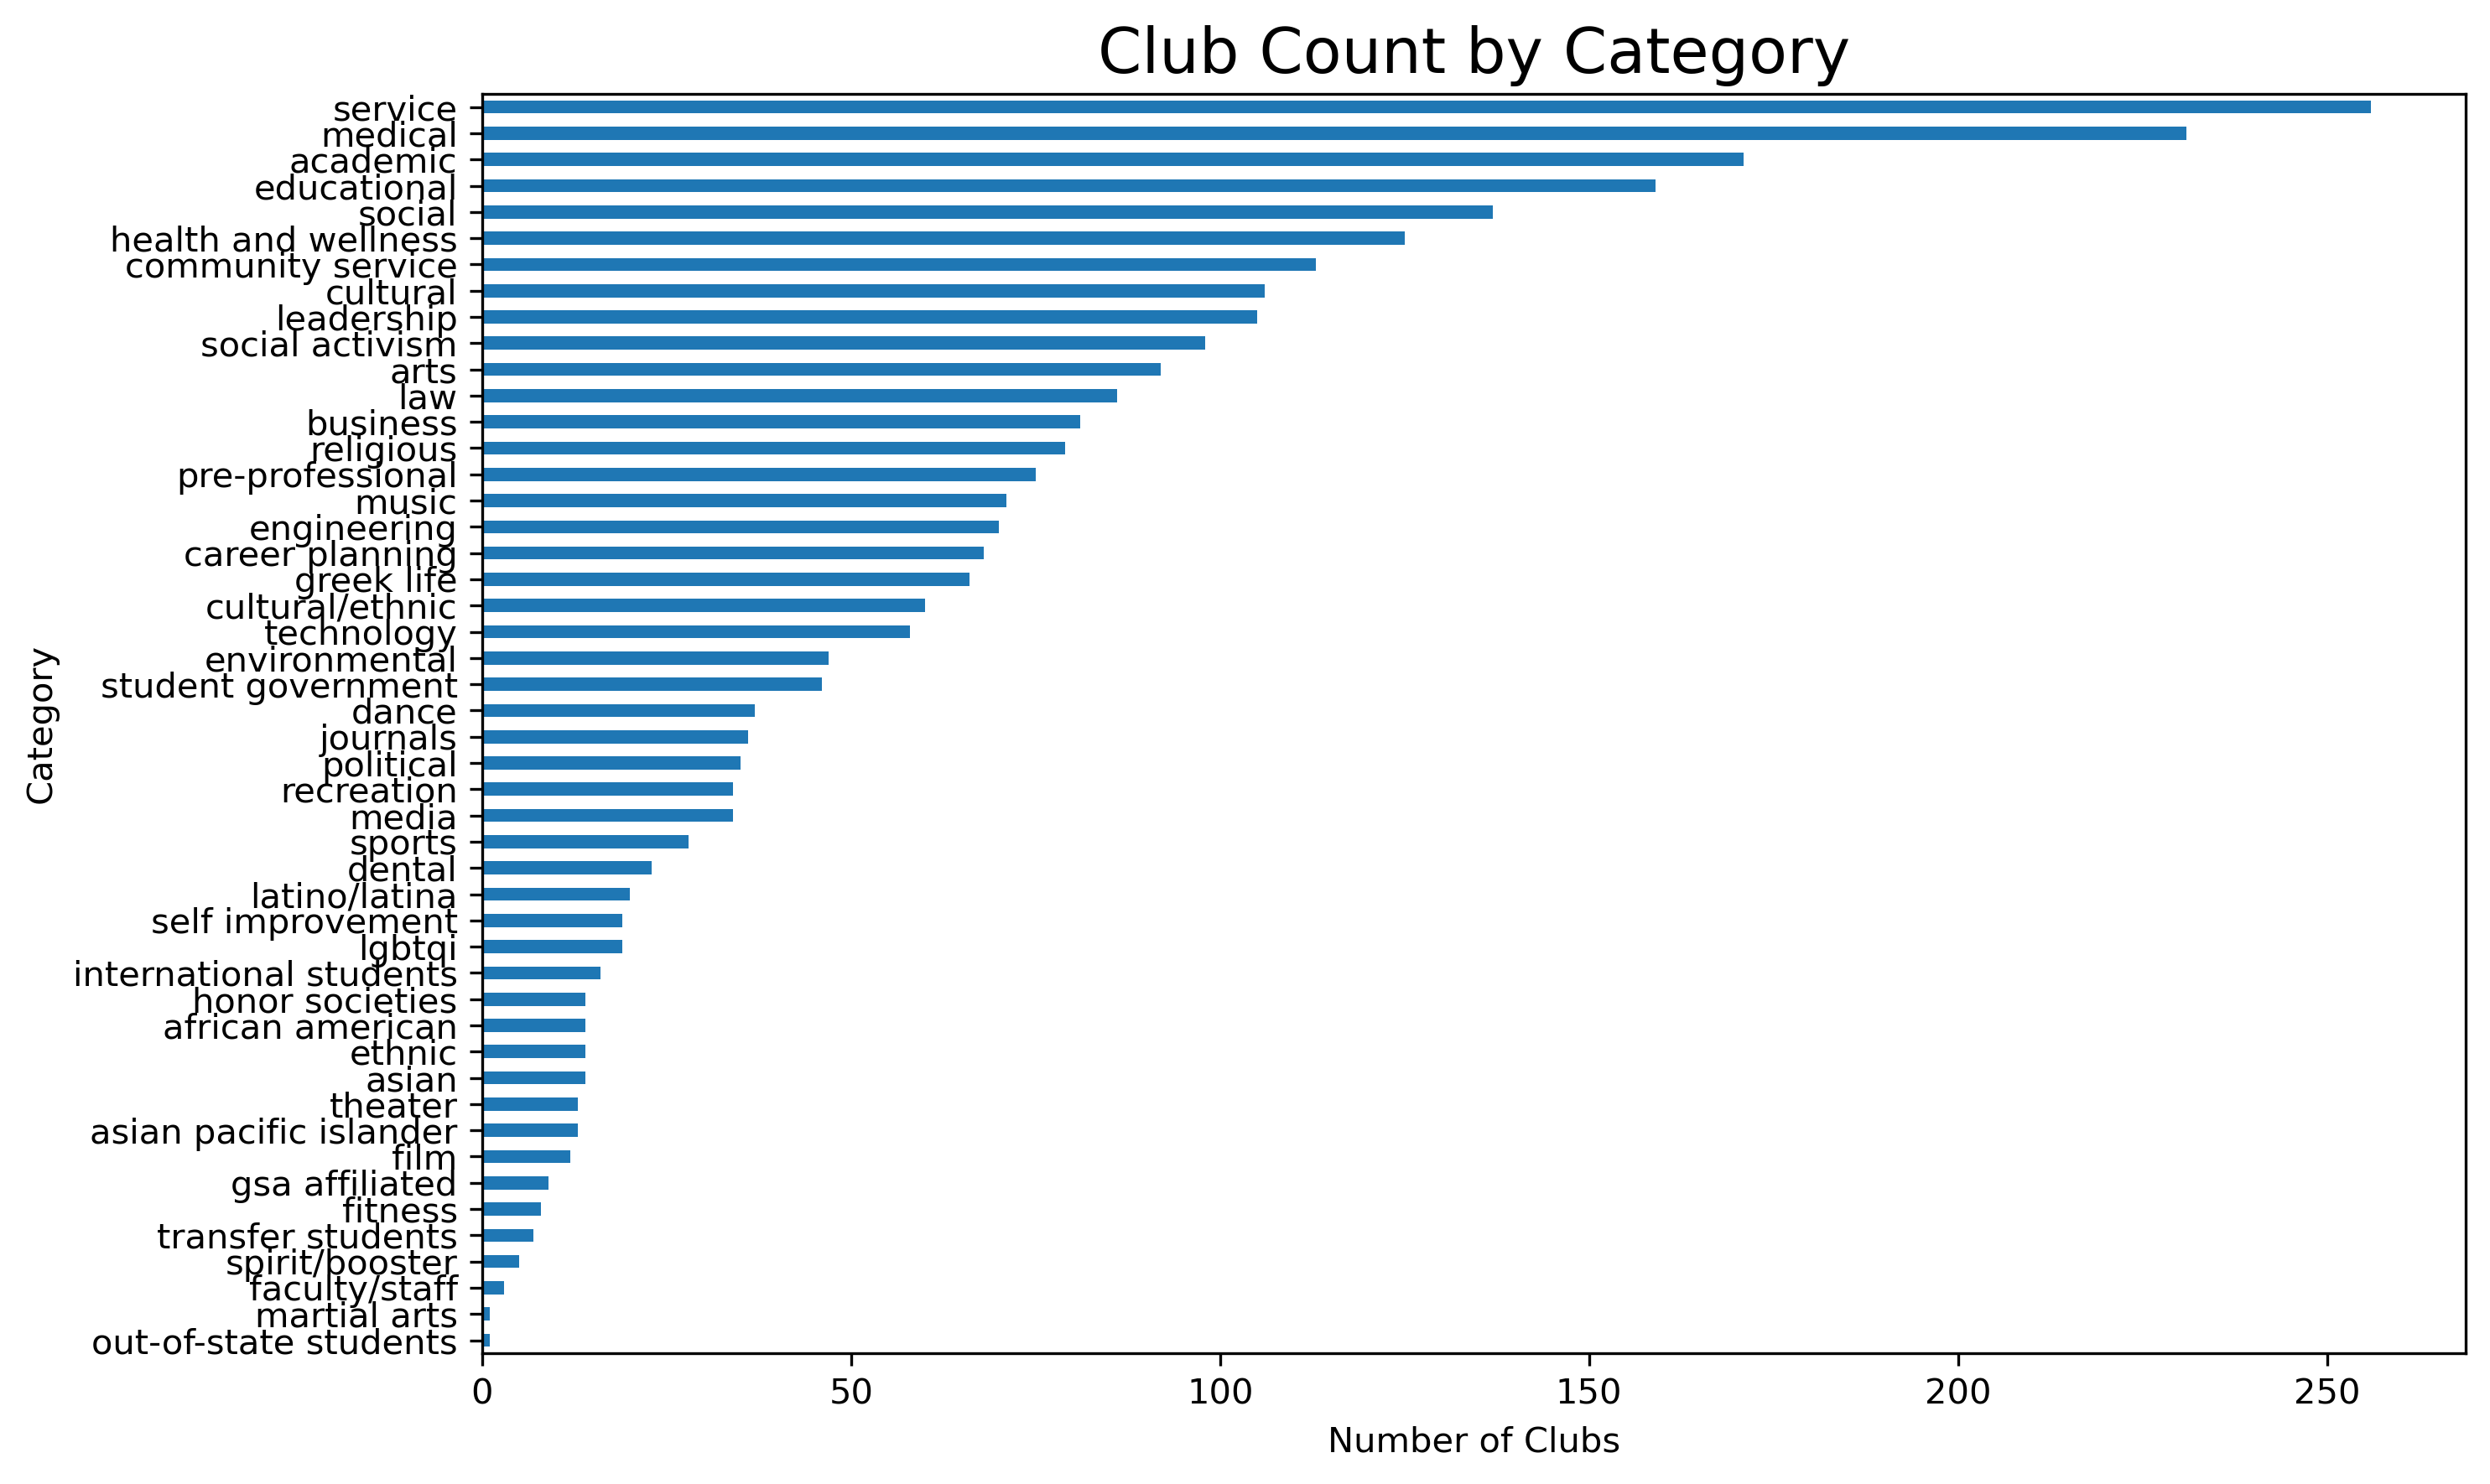

In [22]:
cat_counts = df['category'].value_counts()
fig, ax = plt.subplots(figsize=(10,6), dpi=300)  # high‑dpi for crispness
cat_counts.plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_title("Club Count by Category", fontsize=18)
ax.set_xlabel("Number of Clubs")
ax.set_ylabel("Category")
plt.tight_layout()

# save
bar_path = "ucla_clubs_category_counts.png"
fig.savefig(bar_path, bbox_inches='tight')

In [23]:
# Calculate category counts and their percentages
cat_counts = df['category'].value_counts().reset_index()
cat_counts.columns = ['category', 'count']
cat_counts['percentage'] = (cat_counts['count'] / cat_counts['count'].sum()) * 100

# Round the percentage to 2 decimal places
cat_counts['percentage'] = cat_counts['percentage'].round(2)
cat_counts

,category,count,percentage
0,service,256,9.05
1,medical,231,8.17
2,academic,171,6.04
3,educational,159,5.62
4,social,137,4.84
5,health and wellness,125,4.42
6,community service,113,3.99
7,cultural,106,3.75
8,leadership,105,3.71
9,social activism,98,3.46


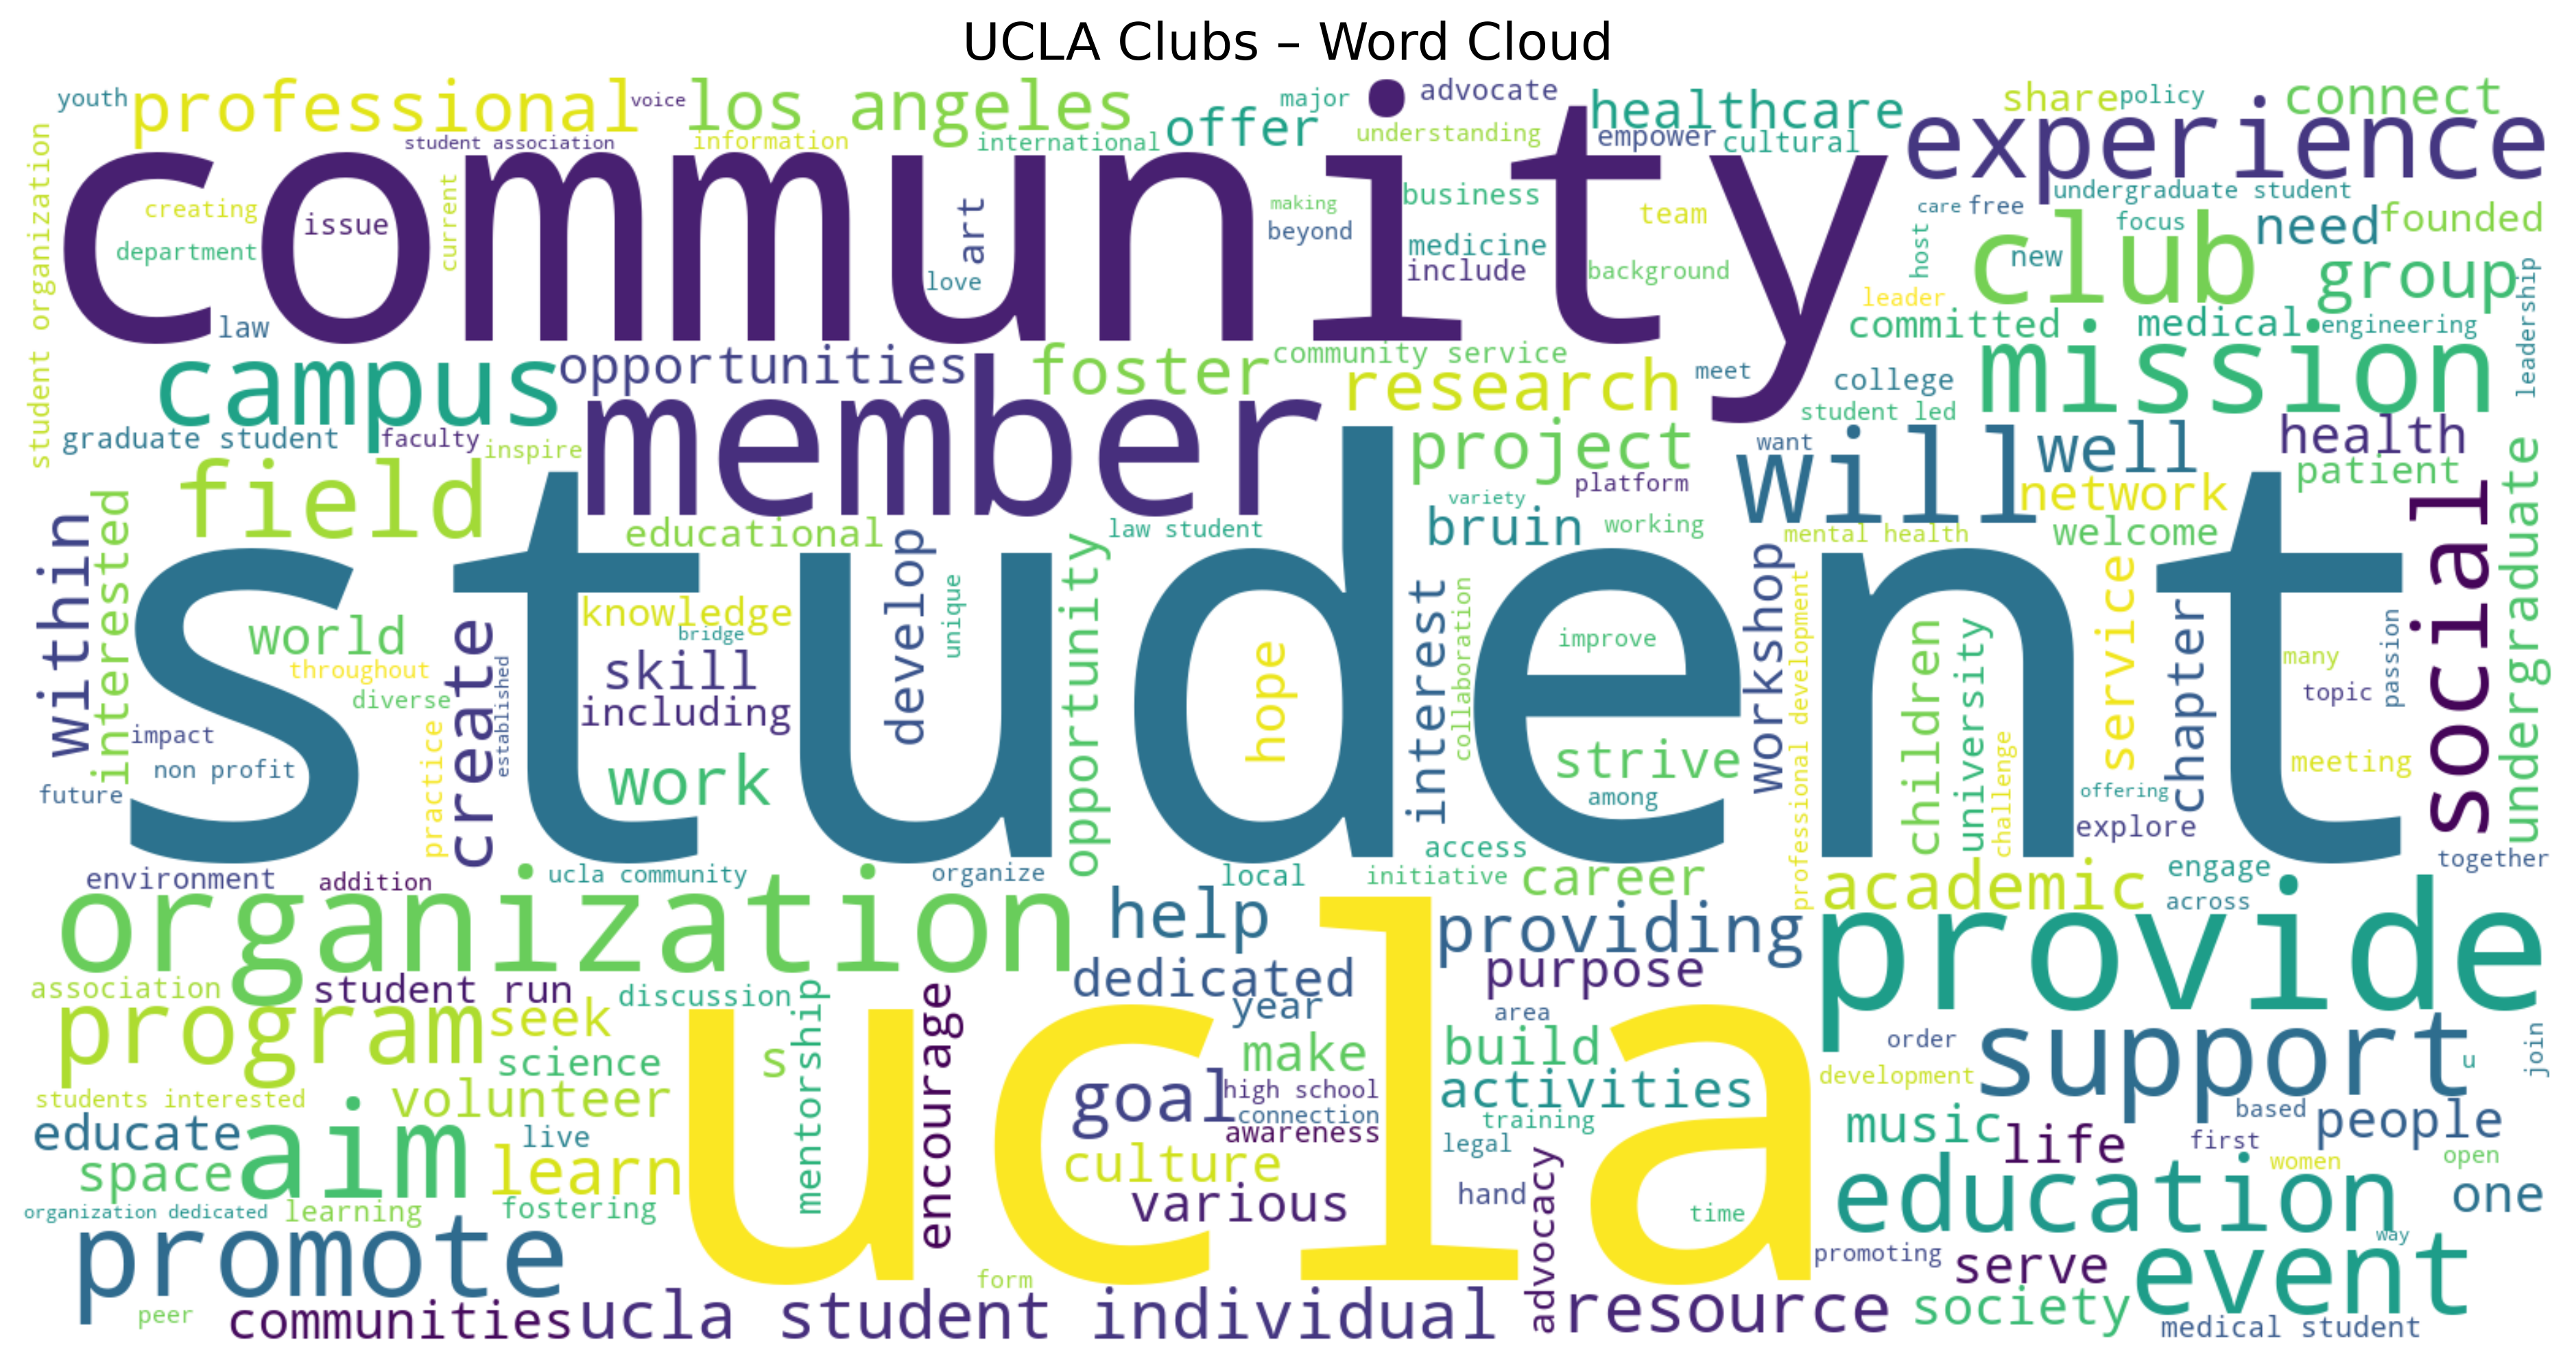

In [24]:
# build corpus & wordcloud
text_corpus = " ".join(df['description'].astype(str).tolist()).lower()
wordcloud = WordCloud(
    width=1600, height=800,  # 2× size for higher resolution
    stopwords=set(STOPWORDS),
    background_color='white'
).generate(text_corpus)

# create a high‑DPI figure
fig, ax = plt.subplots(figsize=(16,8), dpi=300)   # dpi=300 → print‑quality
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title("UCLA Clubs – Word Cloud", fontsize=18)

# save to file
file_path = "ucla_clubs_wordcloud.png"
fig.savefig(file_path, bbox_inches='tight')